In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def initialize_parameters_deep(layer_dims):
    np.random.seed(1)
    parameters = {}
    L = len(layer_dims)

    for l in range(1, L):
        parameters['W' + str(l)] = np.random.randn(layer_dims[l], layer_dims[l-1]) / np.sqrt(layer_dims[l-1])
        parameters['b' + str(l)] = np.zeros((layer_dims[l], 1))
        
    return parameters

In [3]:
def update_parameters(parameters, grads, learning_rate):
    L = len(parameters) // 2 
    for l in range(L):
        parameters["W" + str(l+1)] = parameters["W" + str(l+1)] - learning_rate * grads["dW" + str(l+1)]
        parameters["b" + str(l+1)] = parameters["b" + str(l+1)] - learning_rate * grads["db" + str(l+1)]
        
    return parameters

In [4]:
def L_model_forward(X, parameters):
    caches = []
    A = X
    L = len(parameters) // 2
    for l in range(1, L):
        A_prev = A 
        A, cache = linear_activation_forward(A_prev, parameters['W' + str(l)], parameters['b' + str(l)], activation = "tanh")
        caches.append(cache)
    
    AL, cache = linear_activation_forward(A, parameters['W' + str(L)], parameters['b' + str(L)], activation = "rect")
    caches.append(cache)
    
    return AL, caches

In [5]:
def linear_activation_forward(A_prev, W, b, activation):
    Z = W.dot(A_prev) + b
    linear_cache = (A_prev, W, b)     
    if activation == "tanh":
        A = np.tanh(Z)
    elif activation == "rect":
        A = np.array(Z, copy=True)
    activation_cache = Z
    cache = (linear_cache, activation_cache)
    
    return A, cache

In [6]:
def L_model_backward(AL, Y, caches):
    grads = {}
    L = len(caches)
    m = AL.shape[1]
    Y = Y.reshape(AL.shape)
    dAL = (AL - Y)
    current_cache = caches[L-1]
    grads["dA" + str(L-1)], grads["dW" + str(L)], grads["db" + str(L)] = linear_activation_backward(dAL, current_cache, activation = "rect")
    
    for l in reversed(range(L-1)):
        current_cache = caches[l]
        dA_prev_temp, dW_temp, db_temp = linear_activation_backward(grads["dA" + str(l + 1)], current_cache, activation = "tanh")
        grads["dA" + str(l)] = dA_prev_temp
        grads["dW" + str(l + 1)] = dW_temp
        grads["db" + str(l + 1)] = db_temp

    return grads

In [7]:
def linear_activation_backward(dA, cache, activation):
    linear_cache, activation_cache = cache    
    if activation == "tanh":
        dZ = dA * (1 - np.power(np.tanh(activation_cache),2))
    if activation == "rect":
        dZ = dA * 1
    A_prev, W, b = linear_cache
    m = A_prev.shape[1]
    dW = 1./m * np.dot(dZ,A_prev.T)
    db = 1./m * np.sum(dZ, axis = 1, keepdims = True)
    dA_prev = np.dot(W.T,dZ)
    
    return dA_prev, dW, db

In [68]:
def L_layer_model(X, Y, x_val, y_val, layers_dims, learning_rate = 0.01, num_iterations = 1000, print_cost=False):
    np.random.seed(1)
    costs = []
    costs_val = []
    parameters = initialize_parameters_deep(layers_dims)
    
    for i in range(0, num_iterations):
        AL, caches =  L_model_forward(X, parameters)
        AL_val, _ = L_model_forward(x_val, parameters)
        cost = (1/2) * np.sum(np.power(AL - Y, 2))
        cost_val = (1/2) * np.sum(np.power(AL_val - y_val, 2))
        cost = np.squeeze(cost) 
        cost_val = np.squeeze(cost_val) 
        if print_cost and i % 1 == 0:            
            costs.append(cost)
            costs_val.append(cost_val)
        if print_cost and i % 100 == 0:
            print ("Iteración %i. Costo training: %f. Costo testing: %f" %(i, cost, cost_val))
        grads = L_model_backward(AL, Y, caches)
        parameters = update_parameters(parameters, grads, learning_rate)
        
    plt.figure(figsize=(8,6))
    plt.plot(np.squeeze(costs), 'blue')
    plt.plot(np.squeeze(costs_val), 'red')
    plt.ylabel('Costo')
    plt.xlabel('Iteración')
    plt.title("Learning rate =" + str(learning_rate))
    
    plt.show()
    
    return parameters

In [75]:
from sklearn.model_selection import train_test_split

"""x = np.zeros([3, 1000])
x[0, :] = np.arange(0, 2 * np.pi, 2 * np.pi/1000) + 2 * np.pi/100
x[1, :] = np.arange(0, 2 * np.pi, 2 * np.pi/1000) + 2 * np.pi/100
x[2, :] = np.arange(-1, 1, 2/1000)
y = (np.sin(x[0, :]) + np.cos(x[1, :]) + x[2, :]).reshape(1,-1)

train_x, test_x, train_y, test_y = train_test_split(x.T, y.T, test_size=0.3)
train_x = train_x.T
train_y = train_y.T
test_x = test_x.T
test_y = test_y.T

print(x.shape)
print(y.shape)
print(train_x.shape)
print(train_y.shape)
print(test_x.shape)
print(test_y.shape)"""

x = np.arange(0, 2 * np.pi, 2 * np.pi/1000) + 2 * np.pi/100
y = np.arange(0, 2 * np.pi, 2 * np.pi/1000) + 2 * np.pi/100
z = np.arange(-1, 1, 2/1000)
f = (np.sin(x) + np.cos(y) + z)
print(f.shape)

(1000,)


Iteración 0. Costo training: 396.474770. Costo testing: 174.436219
Iteración 100. Costo training: 196.221847. Costo testing: 90.535358
Iteración 200. Costo training: 141.806599. Costo testing: 64.918437
Iteración 300. Costo training: 93.349017. Costo testing: 45.080220
Iteración 400. Costo training: 58.212717. Costo testing: 27.710795
Iteración 500. Costo training: 48.901625. Costo testing: 22.904365
Iteración 600. Costo training: 51.839432. Costo testing: 23.668666
Iteración 700. Costo training: 46.067487. Costo testing: 20.835666
Iteración 800. Costo training: 41.430426. Costo testing: 18.552266
Iteración 900. Costo training: 37.632409. Costo testing: 16.687142
Iteración 1000. Costo training: 34.463620. Costo testing: 15.143011
Iteración 1100. Costo training: 31.753253. Costo testing: 13.837488
Iteración 1200. Costo training: 29.375011. Costo testing: 12.707864
Iteración 1300. Costo training: 27.250254. Costo testing: 11.713322
Iteración 1400. Costo training: 25.335279. Costo testing

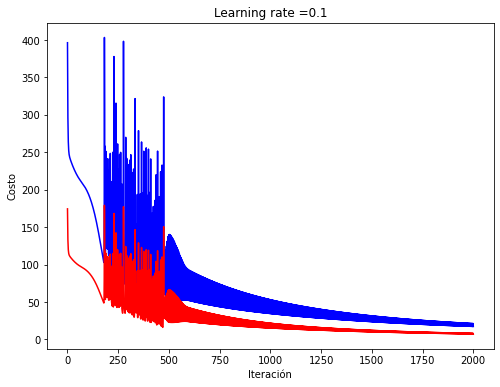

In [71]:
layers_dims = [train_x.shape[0], 3, 3, 1]
parameters = L_layer_model(train_x, train_y, test_x, test_y, layers_dims, learning_rate = 0.1, num_iterations = 2001, print_cost = True)

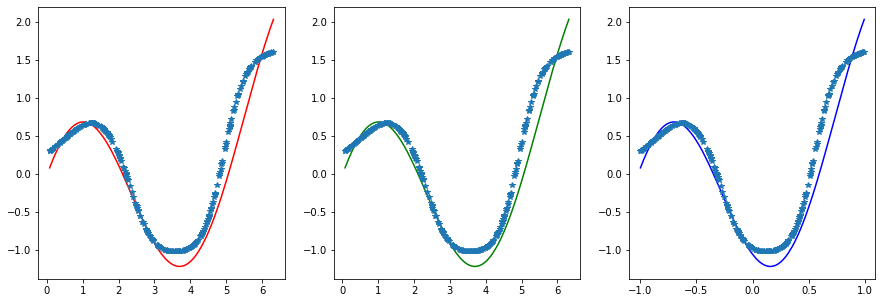

In [72]:
pred_test, _ = L_model_forward(test_x, parameters)
indices0 = np.argsort(test_x[0, :])
indices1 = np.argsort(test_x[1, :])
indices2 = np.argsort(test_x[2, :])

plt.figure(figsize=(15, 5))

plt.subplot(1,3,1)
plt.plot(test_x[0, :][indices0], test_y[0][indices0], 'red')
plt.plot(test_x[0, :], pred_test[0], '*')

plt.subplot(1,3,2)
plt.plot(test_x[1, :][indices1], test_y[0][indices1], 'green')
plt.plot(test_x[1, :], pred_test[0], '*')

plt.subplot(1,3,3)
plt.plot(test_x[2, :][indices2], test_y[0][indices2], 'blue')
plt.plot(test_x[2, :], pred_test[0], '*')

plt.show()